In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
# Para realizar cálculos numéricos y operaciones vectoriales
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

# Muestra las gráficas dentro del cuaderno
%matplotlib inline

In [2]:
# importando pandas para el analisis de datos
import pandas as pd
# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

#from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('bodyfat.csv')

In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(data)

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [9]:
# Lectura de Datos
# iloc accede a los datos
# x me muestra las primeras 12 columnas
columnas_seleccionadas = list(range(0, 1)) + list(range(2, 15))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 1]
m = y.size

In [10]:
print(X)
print('*'*20)
print(y)
print('*'*20)
print(m)

     Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  
0     21.9    

In [11]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [12]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

     Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  
0     21.9    

In [13]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
# np.ones(m, numero de columnas)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

[[ 1.          0.80164696 -1.74007329 ... -0.09067593 -0.62671828
  -1.2125412 ]
 [ 1.          1.56506057 -1.81958344 ... -0.58814329  0.11707924
  -0.0319426 ]
 [ 1.         -0.74623993 -1.81958344 ... -1.15193963 -1.71762131
  -1.74917692]
 ...
 [ 1.         -1.19902317  2.15592399 ... -0.32282736 -0.72589128
  -0.24659689]
 [ 1.         -0.82521375  2.15592399 ... -0.58814329  0.36501175
   1.68529172]
 [ 1.         -1.49912369  2.31494429 ...  0.47312041  0.66253075
   2.86589032]]


In [15]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    # shape == devuelve el tamaño de la primera dimensión del arreglo
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # valor del costo
    J = 0

    # Se calcula la hipótesis
    h = np.dot(X, theta)

    # square == elevado
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [18]:
fila_deseada = 120

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

[1.0358, 27.9, 52.0, 206.5, 74.5, 40.8, 104.3, 99.2, 104.1, 58.5, 39.3, 24.6, 33.9, 31.2, 19.5]


theta calculado por el descenso por el gradiente: [19.02207902 -6.36341508  0.49566292  0.05487481 -0.09947236 -0.3482532
  0.49835302  1.5857279   0.09098171  0.19040126 -0.08028288 -0.08748738
 -0.06690489  0.22461432 -0.57094473]
El valor predecido es (usando el descenso por el gradiente): 26.0296


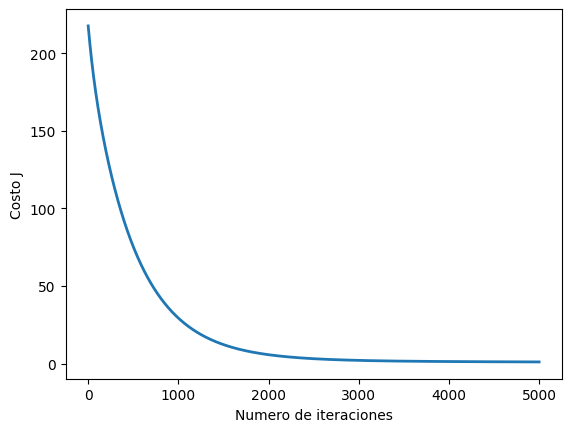

In [19]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 1.0358, 52.0, 206.5, 74.5, 40.8, 104.3, 99.2, 104.1, 58.5, 39.3, 24.6, 33.9, 31.2, 19.5]
X_array[1:15] = (X_array[1:15] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

# ECUACIÓN DE LA NORMAL

In [20]:
print(data)

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  

In [21]:
columnas_seleccionadas = list(range(0, 1)) + list(range(2, 15))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 1]
m = y.size

In [22]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [23]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [25]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el número total de fumadores con distintas caracteristicas

X_array = [1, 1.0358, 52.0, 206.5, 74.5, 40.8, 104.3, 99.2, 104.1, 58.5, 39.3, 24.6, 33.9, 31.2, 19.5]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 4.50012569e+02 -4.11237849e+02  1.25870031e-02  1.00541597e-02
 -7.98073928e-03 -2.84558253e-02  2.67803354e-02  1.85648834e-02
  1.91660401e-02 -1.67583631e-02 -4.63900523e-03 -8.56761181e-02
 -5.50508219e-02  3.38634347e-02  7.34493756e-03]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $28
